# Binary search tree

Source: https://blog.boot.dev/computer-science/binary-search-tree-in-python/

In [1]:
import pickle
import random

import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout

### For Mac M1
```bash
brew install graphviz
python -m pip install \
    --global-option=build_ext \
    --global-option="-I$(brew --prefix graphviz)/include/" \
    --global-option="-L$(brew --prefix graphviz)/lib/" \
    pygraphviz
```

In [2]:
class BSTNode:
    def __init__(self, val=None):
        self.left = None
        self.right = None
        self.val = val

    # -----------------------------------------
    # insert()
    def insert(self, val):
        if not self.val:
            self.val = val
            return

        if self.val == val:
            return

        if val < self.val:
            if self.left:
                self.left.insert(val)
                return
            self.left = BSTNode(val)
            return

        if self.right:
            self.right.insert(val)
            return
        self.right = BSTNode(val)

    # -----------------------------------------
    # get_min() and get_max()
    def get_min(self):
        current = self
        while current.left is not None:
            current = current.left
        return current.val

    def get_max(self):
        current = self
        while current.right is not None:
            current = current.right
        return current.val

    # -----------------------------------------
    # delete()
    def delete(self, val):
        if self == None:
            return self
        if val < self.val:
            self.left = self.left.delete(val)
            return self
        if val > self.val:
            self.right = self.right.delete(val)
            return self
        if self.right == None:
            return self.left
        if self.left == None:
            return self.right
        min_larger_node = self.right
        while min_larger_node.left:
            min_larger_node = min_larger_node.left
        self.val = min_larger_node.val
        self.right = self.right.delete(min_larger_node.val)
        return self

    # -----------------------------------------
    # exists()
    def exists(self, val):
        if val == self.val:
            return True

        if val < self.val:
            if self.left == None:
                return False
            return self.left.exists(val)

        if self.right == None:
            return False
        return self.right.exists(val)

    # -----------------------------------------
    # inorder()
    def inorder(self, vals):
        if self.left is not None:
            self.left.inorder(vals)
        if self.val is not None:
            vals.append(self.val)
        if self.right is not None:
            self.right.inorder(vals)
        return vals

    # -----------------------------------------
    # tograph()
    def tograph(self):
        G = nx.DiGraph()
        G.add_node(self.val)
        if self.left is not None:
            leftG = self.left.tograph()
            G = nx.union(G, leftG)
            G.add_edge(self.val, self.left.val)
        if self.right is not None:
            rightG = self.right.tograph()
            G = nx.union(G, rightG)
            G.add_edge(self.val, self.right.val)
        return G

In [3]:
with open("stores.pkl", "rb") as f:
    stores = pickle.load(f)

# Generate BST
bst = BSTNode()
for store in stores:
    bst.insert(store["index"])

print("inorder:")
print(bst.inorder([]))

inorder:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220

In [4]:
G = bst.tograph()

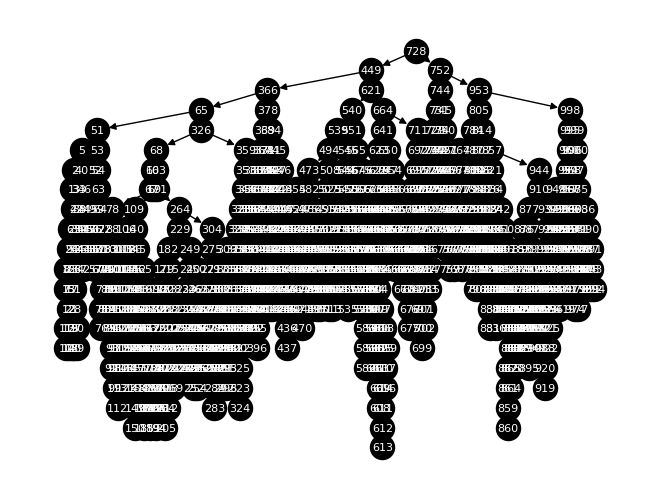

In [5]:
pos = graphviz_layout(G, prog="dot")
pos = {int(k): v for k, v in pos.items()}
nx.draw(
    G,
    pos,
    with_labels=True,
    node_color="black",
    font_color="white",
    font_size=8,
)

In [6]:
!kernprof -l binary-tree.py

Wrote profile results to binary-tree.py.lprof


In [7]:
!python -m line_profiler binary-tree.py.lprof

Timer unit: 1e-06 s

Total time: 7.57308 s
File: binary-tree.py
Function: exists at line 71

Line #      Hits         Time  Per Hit   % Time  Line Contents
    71                                               @profile
    72                                               def exists(self, val):
    73  10898067    1409257.0      0.1     18.6          if val == self.val:
    74   1000000     105520.0      0.1      1.4              return True
    75                                           
    76   5486731     632478.0      0.1      8.4          if val < self.val:
    77   5486731     640713.0      0.1      8.5              if self.left == None:
    78                                                           return False
    79   5486731    2107409.0      0.4     27.8              return self.left.exists(val)
    80                                           
    81   5411336     623164.0      0.1      8.2          if self.right == None:
    82                                           